## Portfolio Management: Take-away Paper

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
#!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage

In [2]:
pm_tap = pd.read_excel("TAP-excel.xlsx")

In [3]:
pm_tap
pm_tap.columns

Index(['DATE', 'Index Return ', 'AMT', 'ANF', 'ATU', 'BBGI', 'BELFA', 'BIO',
       'BRC', 'CCO', 'CHCI', 'CNBKA', 'CVTI', 'DDS', 'DGICA', 'EL', 'EVR',
       'EZPW', 'FCNCA', 'GEF', 'GG', 'GME', 'JW', 'LPTH', 'MDCA', 'MOG', 'NEN',
       'NNI', 'NUS', 'OPY', 'PFIN', 'RDS', 'RL', 'RUSHA', 'SAM', 'SCHN', 'SCS',
       'SCX', 'SENEA', 'SKX', 'SPR', 'STZ', 'VIA', 'VLGEA', 'VOXX', 'WDR',
       'WSO', 'WSTL', 'WTS', 'ZBRA'],
      dtype='object')

In [4]:
pm_tap.describe(include = "all")

<ipython-input-4-8a72e5bd0fd3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pm_tap.describe(include = "all")


,DATE,Index Return,AMT,ANF,ATU,BBGI,BELFA,BIO,BRC,CCO,...,SPR,STZ,VIA,VLGEA,VOXX,WDR,WSO,WSTL,WTS,ZBRA
count,1510,1509.000000,1510.000000,1510.000000,1510.000000,1510.00000,1510.000000,1510.000000,1510.00000,1510.0000,...,1510.000000,1510.000000,1510.000000,1510.00000,1510.00000,1510.000000,1510.000000,1510.00000,1510.00000,1510.000000
unique,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2013-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,-0.040979,68.344997,8.885000,17.545000,3.02500,11.825000,106.430000,19.51500,3.4150,...,15.935000,30.905000,27.670000,19.31500,2.51500,15.405000,74.134998,0.45500,43.34000,40.679998
25%,NaN,-0.002974,88.767499,18.335000,23.925000,4.97125,16.720000,121.950001,26.67625,4.9250,...,34.022500,84.884998,39.074999,24.90625,5.12500,19.477499,98.605000,1.15000,54.57125,61.887500
50%,NaN,0.000504,99.624998,24.310000,26.030001,6.47500,19.682500,140.867500,32.23000,6.5675,...,48.880000,141.042500,47.377501,27.39500,7.16250,28.420000,127.020000,1.90500,60.05500,78.467499
75%,NaN,0.004662,132.327499,35.077500,31.237500,9.14375,22.110000,220.500000,37.22500,8.0550,...,60.450000,183.804996,70.816250,31.39375,9.39375,48.872500,149.767498,2.97375,65.28000,105.903750


### Question 2:
An investor is making portfolio selection based on a single-index model with the stock and 
index prices provided in the accompanying Excel file, under tab “Question 2”. Assuming 
short sale is permitted, and the risk free rate is 2% per annum continuously compounded, 
determine the investor’s portfolio.

In [5]:
# ___________________Generating Assets Logarithm Return______________________

pm_tap["AMT_log"] = np.log(pm_tap.AMT / pm_tap.AMT.shift(1))
pm_tap["ANF_log"] = np.log(pm_tap.ANF / pm_tap.ANF.shift(1))
pm_tap["ATU_log"] = np.log(pm_tap.ATU / pm_tap.ATU.shift(1))
pm_tap["BBGI_log"] = np.log(pm_tap.BBGI / pm_tap.BBGI.shift(1))
pm_tap["BELFA_log"] = np.log(pm_tap.BELFA / pm_tap.BELFA.shift(1))
pm_tap["BIO_log"] = np.log(pm_tap.BIO / pm_tap.BIO.shift(1))
pm_tap["BRC_log"] = np.log(pm_tap.BRC / pm_tap.BRC.shift(1))
pm_tap["CCO_log"] = np.log(pm_tap.CCO / pm_tap.CCO.shift(1))
pm_tap["CHCI_log"] = np.log(pm_tap.CHCI / pm_tap.CHCI.shift(1))
pm_tap["CNBKA_log"] = np.log(pm_tap.CNBKA / pm_tap.CNBKA.shift(1))
pm_tap["CVTI_log"] = np.log(pm_tap.CVTI / pm_tap.CVTI.shift(1))
pm_tap["DDS_log"] = np.log(pm_tap.DDS / pm_tap.DDS.shift(1))
pm_tap["DGICA_log"] = np.log(pm_tap.DGICA / pm_tap.DGICA.shift(1))
pm_tap["EL_log"] = np.log(pm_tap.EL / pm_tap.EL.shift(1))
pm_tap["EVR_log"] = np.log(pm_tap.EVR / pm_tap.EVR.shift(1))
pm_tap["EZPW_log"] = np.log(pm_tap.EZPW / pm_tap.EZPW.shift(1))
pm_tap["FCNCA_log"] = np.log(pm_tap.FCNCA / pm_tap.FCNCA.shift(1))
pm_tap["GEF_log"] = np.log(pm_tap.GEF / pm_tap.GEF.shift(1))
pm_tap["GG_log"] = np.log(pm_tap.GG / pm_tap.GG.shift(1))
pm_tap["GME_log"] = np.log(pm_tap.GME / pm_tap.GME.shift(1))
pm_tap["JW_log"] = np.log(pm_tap.JW / pm_tap.JW.shift(1))
pm_tap["LPTH_log"] = np.log(pm_tap.LPTH / pm_tap.LPTH.shift(1))
pm_tap["MDCA_log"] = np.log(pm_tap.MDCA / pm_tap.MDCA.shift(1))
pm_tap["MOG_log"] = np.log(pm_tap.MOG / pm_tap.MOG.shift(1))
pm_tap["NEN_log"] = np.log(pm_tap.NEN / pm_tap.NEN.shift(1))
pm_tap["NNI_log"] = np.log(pm_tap.NNI / pm_tap.NNI.shift(1))
pm_tap["NUS_log"] = np.log(pm_tap.NUS / pm_tap.NUS.shift(1))
pm_tap["OPY_log"] = np.log(pm_tap.OPY / pm_tap.OPY.shift(1))
pm_tap["PFIN_log"] = np.log(pm_tap.PFIN / pm_tap.PFIN.shift(1))
pm_tap["RDS_log"] = np.log(pm_tap.RDS / pm_tap.RDS.shift(1))
pm_tap["RL_log"] = np.log(pm_tap.RL / pm_tap.RL.shift(1))
pm_tap["RUSHA_log"] = np.log(pm_tap.RUSHA / pm_tap.RUSHA.shift(1))
pm_tap["SAM_log"] = np.log(pm_tap.SAM / pm_tap.SAM.shift(1))
pm_tap["SCHN_log"] = np.log(pm_tap.SCHN / pm_tap.SCHN.shift(1))
pm_tap["SCS_log"] = np.log(pm_tap.SCS / pm_tap.SCS.shift(1))
pm_tap["SCX_log"] = np.log(pm_tap.SCX / pm_tap.SCX.shift(1))
pm_tap["SENEA_log"] = np.log(pm_tap.SENEA / pm_tap.SENEA.shift(1))
pm_tap["SKX_log"] = np.log(pm_tap.SKX / pm_tap.SKX.shift(1))
pm_tap["SPR_log"] = np.log(pm_tap.SPR / pm_tap.SPR.shift(1))
pm_tap["STZ_log"] = np.log(pm_tap.STZ / pm_tap.STZ.shift(1))
pm_tap["VIA_log"] = np.log(pm_tap.VIA / pm_tap.VIA.shift(1))
pm_tap["VLGEA_log"] = np.log(pm_tap.VLGEA / pm_tap.VLGEA.shift(1))
pm_tap["VOXX_log"] = np.log(pm_tap.VOXX / pm_tap.VOXX.shift(1))
pm_tap["WDR_log"] = np.log(pm_tap.WDR / pm_tap.WDR.shift(1))
pm_tap["WSO_log"] = np.log(pm_tap.WSO / pm_tap.WSO.shift(1))
pm_tap["WSTL_log"] = np.log(pm_tap.WSTL / pm_tap.WSTL.shift(1))
pm_tap["WTS_log"] = np.log(pm_tap.WTS / pm_tap.WTS.shift(1))
pm_tap["ZBRA_log"] = np.log(pm_tap.ZBRA / pm_tap.ZBRA.shift(1))

In [6]:
Y = pm_tap["Index Return "]
X = pm_tap[["AMT_log", "ANF_log", "ATU_log", "BBGI_log", "BELFA_log", "BIO_log", "BRC_log", "CCO_log", "CHCI_log", "CNBKA_log", "CVTI_log", "DDS_log", "DGICA_log",
            "EL_log", "EVR_log", "EZPW_log", "FCNCA_log", "GEF_log", "GG_log", "GME_log", "JW_log", "LPTH_log", "MDCA_log", "MOG_log", "NEN_log", "NNI_log", "NUS_log", "OPY_log",
            "PFIN_log", "RDS_log", "RL_log", "RUSHA_log", "SAM_log", "SCHN_log", "SCS_log", "SCX_log", "SENEA_log", "SKX_log", "SPR_log", "STZ_log", "VIA_log", "VLGEA_log",
            "VOXX_log", "WDR_log", "WSO_log", "WSTL_log", "WTS_log", "ZBRA_log"]]
clean_tap = pm_tap.dropna()

reg_Y = pd.DataFrame(clean_tap["Index Return "])
reg_X = clean_tap[["AMT_log", "ANF_log", "ATU_log", "BBGI_log", "BELFA_log", "BIO_log", "BRC_log", "CCO_log", "CHCI_log", "CNBKA_log", "CVTI_log", "DDS_log", "DGICA_log",
               "EL_log", "EVR_log", "EZPW_log", "FCNCA_log", "GEF_log", "GG_log", "GME_log", "JW_log", "LPTH_log", "MDCA_log", "MOG_log", "NEN_log", "NNI_log", "NUS_log", "OPY_log",
               "PFIN_log", "RDS_log", "RL_log", "RUSHA_log", "SAM_log", "SCHN_log", "SCS_log", "SCX_log", "SENEA_log", "SKX_log", "SPR_log", "STZ_log", "VIA_log", "VLGEA_log",
               "VOXX_log", "WDR_log", "WSO_log", "WSTL_log", "WTS_log", "ZBRA_log"]]

reg_Y["constant"] = 1

In [7]:
reg_Y

,Index Return,constant
1,-0.002086,1
2,0.004865,1
3,-0.003123,1
4,-0.003242,1
5,0.002656,1
...,...,...
1505,-0.027112,1
1506,0.049594,1
1507,0.008563,1
1508,-0.001242,1


In [8]:
reg_X

,AMT_log,ANF_log,ATU_log,BBGI_log,BELFA_log,BIO_log,BRC_log,CCO_log,CHCI_log,CNBKA_log,...,SPR_log,STZ_log,VIA_log,VLGEA_log,VOXX_log,WDR_log,WSO_log,WSTL_log,WTS_log,ZBRA_log
1,-0.024334,-0.009615,-0.002463,-0.019164,-0.033950,0.001163,-0.000145,0.012036,0.016529,-0.010055,...,0.035221,-0.023166,-0.001818,-0.033971,0.015703,-0.007080,0.006719,0.010899,-0.009242,0.001098
2,-0.001167,0.006244,0.001760,0.017163,-0.006930,0.009073,0.006645,-0.007062,-0.008230,-0.013721,...,-0.001676,0.001906,0.011715,-0.013437,0.021024,0.022182,0.004048,0.032003,-0.002913,-0.007592
3,-0.001169,-0.000106,-0.005289,-0.034627,0.016382,0.004506,-0.004908,0.046391,0.044452,0.001086,...,-0.042839,-0.009566,-0.020330,-0.019887,0.038767,-0.006013,-0.005208,-0.010554,-0.026835,0.005516
4,0.004150,0.006101,-0.002832,0.025577,0.003983,0.003617,-0.017369,-0.026047,0.007874,0.005258,...,-0.012331,-0.009381,0.012334,-0.022326,0.010617,-0.006326,-0.008611,-0.005319,0.001727,0.000489
5,0.005678,-0.006101,0.013383,-0.007096,0.003684,0.012988,0.009816,0.028074,0.049723,0.002157,...,-0.016081,-0.007233,0.014824,0.001567,0.031192,-0.000828,0.005253,0.015873,0.000345,0.011057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,-0.027838,0.012266,-0.019413,-0.010899,-0.037846,-0.022452,-0.023934,-0.013566,-0.002845,0.001351,...,-0.026490,-0.031378,-0.017731,-0.054784,-0.079673,-0.039116,-0.007399,-0.012937,-0.023773,-0.022647
1506,0.023971,0.098866,0.059577,-0.106884,-0.000715,0.031944,0.031948,0.002923,0.050010,0.014881,...,0.028192,0.039361,0.050389,0.022514,-0.053066,0.055831,0.038929,-0.015748,0.033299,0.064460
1507,0.007213,0.014099,0.013517,0.051979,0.039248,0.010012,0.021061,-0.017665,-0.105662,-0.083016,...,0.048487,0.000183,0.019904,0.001787,0.006317,0.017564,-0.005053,0.002642,0.005859,0.018548
1508,0.001071,0.004656,-0.010605,0.024304,-0.015934,-0.000392,0.007785,0.027345,0.032596,0.025459,...,-0.003457,-0.004075,-0.033396,0.055007,-0.007585,0.000561,0.005923,0.005263,-0.000857,0.003277


In [123]:
# _______________Regression: calculating alphas and betas_________________

def regression(reg_Y, reg_X):
        
    reg = sm.OLS(reg_Y-0.02/252, reg_X-0.02/252)
    res = reg.fit()
        
    return res.params[1], res.params[0] # 1 is alpha and 0 is beta

alpha = {}
beta = {}

for i in range (48):
    col_name = reg_X.columns[i]
    alpha[col_name], beta[col_name] = regression(reg_X[col_name], reg_Y)

beta #alpha

{'AMT_log': 0.7196405214218248,
 'ANF_log': 1.016425092157251,
 'ATU_log': 1.2257442396189622,
 'BBGI_log': 0.4123617126350534,
 'BELFA_log': 0.9694772252606981,
 'BIO_log': 0.8429217542356248,
 'BRC_log': 0.9143546226502581,
 'CCO_log': 0.9733620221518234,
 'CHCI_log': -0.10857641161104313,
 'CNBKA_log': 0.41885997590871465,
 'CVTI_log': 1.1615991977982287,
 'DDS_log': 0.8775490608374984,
 'DGICA_log': 0.514247830025056,
 'EL_log': 0.8986895720123108,
 'EVR_log': 1.4541000421748878,
 'EZPW_log': 0.9019556961949275,
 'FCNCA_log': 0.9690077673592083,
 'GEF_log': 1.1884664610732594,
 'GG_log': 0.23217578840576492,
 'GME_log': 0.908427744633317,
 'JW_log': 0.8705022336787716,
 'LPTH_log': 0.4701467989547353,
 'MDCA_log': 1.1375723060549707,
 'MOG_log': 1.197816380942706,
 'NEN_log': 0.07914017545676441,
 'NNI_log': 0.8652783416815976,
 'NUS_log': 1.1333922102904823,
 'OPY_log': 1.1229832957089894,
 'PFIN_log': 0.2873211590128832,
 'RDS_log': 0.9466899413586437,
 'RL_log': 0.99303522278421

In [117]:
# _______________________Calculating Covariance Metrix_________________________

cov = pd.DataFrame(index = reg_X.columns, columns=reg_X.columns)
for i in range(48):
    for j in range(48):
        col_name_1 = reg_X.columns[i]
        col_name_2 = reg_X.columns[j]
        cov_value = beta[col_name_1]*beta[col_name_2]*reg_Y["Index Return "].var()
        cov.loc[col_name_1][col_name_2] = cov_value

In [118]:
# _____________________Annual Covariance_______________________
#vol = reg_Y.var()
#print(vol)
annual_cov = cov
annual_cov

,AMT_log,ANF_log,ATU_log,BBGI_log,BELFA_log,BIO_log,BRC_log,CCO_log,CHCI_log,CNBKA_log,...,SPR_log,STZ_log,VIA_log,VLGEA_log,VOXX_log,WDR_log,WSO_log,WSTL_log,WTS_log,ZBRA_log
AMT_log,3.39938e-05,4.8013e-05,5.79007e-05,1.94788e-05,4.57954e-05,3.98172e-05,4.31915e-05,4.59789e-05,-5.12884e-06,1.97858e-05,...,5.18776e-05,3.69958e-05,4.3335e-05,3.00322e-05,5.81842e-05,7.2126e-05,4.06951e-05,2.89642e-05,5.31775e-05,6.04658e-05
ANF_log,4.8013e-05,6.78139e-05,8.17793e-05,2.7512e-05,6.46817e-05,5.62381e-05,6.1004e-05,6.49409e-05,-7.24401e-06,2.79455e-05,...,7.32723e-05,5.22531e-05,6.12066e-05,4.24177e-05,8.21798e-05,0.000101871,5.7478e-05,4.09093e-05,7.51082e-05,8.54023e-05
ATU_log,5.79007e-05,8.17793e-05,9.86207e-05,3.31777e-05,7.8002e-05,6.78196e-05,7.3567e-05,7.83146e-05,-8.73582e-06,3.37005e-05,...,8.83617e-05,6.30139e-05,7.38113e-05,5.1153e-05,9.91036e-05,0.00012285,6.93149e-05,4.9334e-05,9.05757e-05,0.00010299
BBGI_log,1.94788e-05,2.7512e-05,3.31777e-05,1.11616e-05,2.62412e-05,2.28157e-05,2.47492e-05,2.63464e-05,-2.93888e-06,1.13375e-05,...,2.97264e-05,2.1199e-05,2.48314e-05,1.72088e-05,3.33402e-05,4.1329e-05,2.33187e-05,1.65968e-05,3.04713e-05,3.46476e-05
BELFA_log,4.57954e-05,6.46817e-05,7.8002e-05,2.62412e-05,6.16941e-05,5.36405e-05,5.81863e-05,6.19413e-05,-6.90942e-06,2.66548e-05,...,6.98879e-05,4.98396e-05,5.83795e-05,4.04585e-05,7.8384e-05,9.71659e-05,5.48232e-05,3.90197e-05,7.1639e-05,8.14576e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDR_log,7.2126e-05,0.000101871,0.00012285,4.1329e-05,9.71659e-05,8.44818e-05,9.16412e-05,9.75552e-05,-1.08821e-05,4.19802e-05,...,0.000110071,7.84955e-05,9.19456e-05,6.37206e-05,0.000123452,0.000153033,8.63444e-05,6.14546e-05,0.000112829,0.000128293
WSO_log,4.06951e-05,5.7478e-05,6.93149e-05,2.33187e-05,5.48232e-05,4.76666e-05,5.1706e-05,5.50428e-05,-6.13991e-06,2.36862e-05,...,6.21044e-05,4.42889e-05,5.18778e-05,3.59526e-05,6.96543e-05,8.63444e-05,4.87175e-05,3.46741e-05,6.36605e-05,7.23857e-05
WSTL_log,2.89642e-05,4.09093e-05,4.9334e-05,1.65968e-05,3.90197e-05,3.39261e-05,3.68011e-05,3.91761e-05,-4.37e-06,1.68584e-05,...,4.4202e-05,3.15221e-05,3.69234e-05,2.55888e-05,4.95756e-05,6.14546e-05,3.46741e-05,2.46788e-05,4.53096e-05,5.15196e-05
WTS_log,5.31775e-05,7.51082e-05,9.05757e-05,3.04713e-05,7.1639e-05,6.22873e-05,6.75658e-05,7.19261e-05,-8.0232e-06,3.09514e-05,...,8.11536e-05,5.78736e-05,6.77902e-05,4.69803e-05,9.10193e-05,0.000112829,6.36605e-05,4.53096e-05,8.31871e-05,9.45884e-05


In [119]:
# _____________________________Calulating mean assets return___________________________________

#reg_Y.drop("constant", axis = 1)

def asset_return(alpha, beta, reg_X):
    asset_returns = {}
    for i in range (48):
        col_name = reg_X.columns[i] 
        asset_returns[col_name] = (alpha[col_name]*252 + (beta[col_name]*reg_X[col_name].mean()))
    return asset_returns

# _________________Dictionary to Series convertion_____________________

mu = pd.Series(asset_return(alpha, beta, reg_X))
print(mu)

AMT_log      0.039898
ANF_log     -0.244358
ATU_log     -0.167011
BBGI_log    -0.101928
BELFA_log   -0.133388
BIO_log      0.043097
BRC_log     -0.052960
CCO_log     -0.146699
CHCI_log     0.072100
CNBKA_log    0.068912
CVTI_log     0.098529
DDS_log     -0.139036
DGICA_log   -0.065938
EL_log       0.036542
EVR_log      0.004509
EZPW_log    -0.251524
FCNCA_log    0.039103
GEF_log     -0.150723
GG_log      -0.262753
GME_log     -0.210119
JW_log      -0.060625
LPTH_log     0.030995
MDCA_log    -0.360157
MOG_log     -0.010908
NEN_log      0.082747
NNI_log      0.004197
NUS_log     -0.024953
OPY_log     -0.044823
PFIN_log    -0.020525
RDS_log     -0.122879
RL_log      -0.162356
RUSHA_log   -0.029059
SAM_log      0.010391
SCHN_log    -0.177167
SCS_log     -0.081030
SCX_log     -0.162484
SENEA_log   -0.108807
SKX_log     -0.064674
SPR_log      0.133341
STZ_log      0.162333
VIA_log     -0.214378
VLGEA_log   -0.113939
VOXX_log    -0.210436
WDR_log     -0.255917
WSO_log      0.011371
WSTL_log  

In [125]:
# ___________________Efficient Frontier and Assets Allocation______________________

ef = EfficientFrontier(mu, annual_cov, weight_bounds=(-1,1)) #tangency portfolio

weights = ef.max_sharpe(risk_free_rate = 0.02) #assets allocation by maximise Sharpe's ratio in account with risk free rate of 2%
weights = ef.clean_weights()
port_perf = ef.portfolio_performance(verbose=True)
(print(port_perf))
print("Portfolio Allocation: ", weights)
print("Portfolio Allocation Weight: ", sum([float(i) for i in weights.values()]))

Expected annual return: 211.8%
Annual volatility: 0.0%
Sharpe Ratio: 984756.50
(2.117693425691761, 2.1301645848198375e-06, 984756.5022160845)
Portfolio Allocation:  OrderedDict([('AMT_log', 0.6957), ('ANF_log', -0.49532), ('ATU_log', -0.59146), ('BBGI_log', -0.31002), ('BELFA_log', -0.41277), ('BIO_log', 0.74268), ('BRC_log', 0.09805), ('CCO_log', -0.50332), ('CHCI_log', 0.5351), ('CNBKA_log', 0.66379), ('CVTI_log', 0.60124), ('DDS_log', -0.47019), ('DGICA_log', -0.07224), ('EL_log', 0.70902), ('EVR_log', 0.60199), ('EZPW_log', -0.46709), ('FCNCA_log', 0.74087), ('GEF_log', -0.48726), ('GG_log', -0.52132), ('GME_log', -0.76175), ('JW_log', 0.03655), ('LPTH_log', 0.58395), ('MDCA_log', 0.12717), ('MOG_log', 0.44416), ('NEN_log', 0.49668), ('NNI_log', 0.48029), ('NUS_log', 0.33471), ('OPY_log', 0.19625), ('PFIN_log', 0.1933), ('RDS_log', -0.34529), ('RL_log', -0.60677), ('RUSHA_log', 0.31185), ('SAM_log', 0.50554), ('SCHN_log', -0.66465), ('SCS_log', -0.03385), ('SCX_log', -0.71798), ('S

In [126]:
weights

OrderedDict([('AMT_log', 0.6957),
             ('ANF_log', -0.49532),
             ('ATU_log', -0.59146),
             ('BBGI_log', -0.31002),
             ('BELFA_log', -0.41277),
             ('BIO_log', 0.74268),
             ('BRC_log', 0.09805),
             ('CCO_log', -0.50332),
             ('CHCI_log', 0.5351),
             ('CNBKA_log', 0.66379),
             ('CVTI_log', 0.60124),
             ('DDS_log', -0.47019),
             ('DGICA_log', -0.07224),
             ('EL_log', 0.70902),
             ('EVR_log', 0.60199),
             ('EZPW_log', -0.46709),
             ('FCNCA_log', 0.74087),
             ('GEF_log', -0.48726),
             ('GG_log', -0.52132),
             ('GME_log', -0.76175),
             ('JW_log', 0.03655),
             ('LPTH_log', 0.58395),
             ('MDCA_log', 0.12717),
             ('MOG_log', 0.44416),
             ('NEN_log', 0.49668),
             ('NNI_log', 0.48029),
             ('NUS_log', 0.33471),
             ('OPY_log', 0.19625),


In [96]:
expected_return_ef = np.dot(np.transpose([i for i in weights.values()]),mu)
variance_ef = np.dot(np.dot(np.array([i for i in weights.values()]), annual_cov),np.transpose([i for i in weights.values()]))
print(expected_return_ef)
print(variance_ef)

2.1453796359233785
4.389789424629624e-12


### Question 4:
An asset manager has the prior beliefs of the expected return and covariance matrix of the 
four assets in his portfolio P:

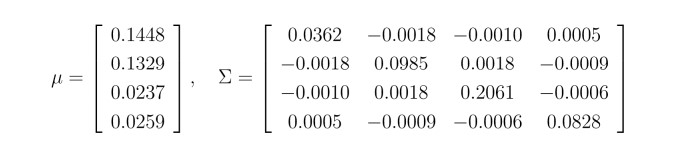

Now the asset manager also has the following subjective views on these asset characteristics 
going forward (in the following we use the term “confidence” to denote the uncertainty 
surrounding these views, as also used in the lecture notes):

• The expected return of the first asset will exceed the expected return of the second asset by 
1% with a confidence of 0.0009. \
• The expected return of the fourth asset will exceed the expected return of the third asset by 
1% with a confidence of 0.0004. \
• The expected return of the first asset will reach to 10% with a confidence of 0.0003. \
• The expected return of the third asset will reach to 1.5% with a confidence of 0.0002.

Assuming the risk-free rate is 0%, please answer the following three questions:

a. Compute and report back the posterior expected return and covariance matrix 
based on these subjective views using the Black-Litterman model. As the 
posterior expected return matrix also relies on the weights of the four assets in a 
market cap-weighted portfolio, you may use the following information for your 
calculation:

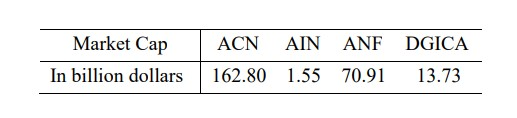

In [37]:
# _____________________Assigning Mu, Covariance and Market Cap__________________________

# _____________________Mu_____________________

mu = np.matrix([[0.1448], [0.1329], [0.0237], [0.0259]])
mu_T = mu.T

# ____________________Covariance____________________

covariance = np.matrix([[0.0362, -0.0018, -0.0010, 0.0005], [-0.0018, 0.0985, 0.0018, -0.0009],
                        [-0.0010, 0.0018, 0.2061, -0.0006], [0.0005, -0.0009, -0.0006, 0.0828]])
covariance_T = covariance.T

# ___________________Market Capitalisation___________________

market_cap = np.matrix([[162.80], [1.55], [70.91], [13.73]])
market_cap_T = market_cap.T

In [35]:
# __________________Market Views_________________

omega = np.matrix([[0.0009, 0, 0, 0], [0, 0.0004, 0, 0], 
                   [0, 0, 0.0003, 0], [0, 0, 0, 0.0002]])

p = np.matrix([[1,-1,0,0], [0,0,-1,1], [1,0,0,0], [0,0,1,0]])
p_T = p.T
q = np.matrix([[0.01], [0.01], [0.1], [0.015]])
q_T = q.T

In [27]:
# ____________________Weighted Capitalisation_______________________

weighted_cap = market_cap / (market_cap.sum())
weighted_cap_T = weighted_cap.T

In [73]:
# ____________________Calculating Coefficient of Risk Aversion_______________________

risk_free_rate = 0
# coefficient of risk aversion (lambda) = expected return - risk free rate / variance
lamb_da = (mu_T*weighted_cap) / float(np.sqrt(weighted_cap_T*covariance*weighted_cap))
lamb_da = float(lamb_da[0][0])

In [74]:
# ___________________Initilising Tau__________________

tau = 0.01

# ______________________Black Litterman Return and Covariance Calculation_______________________________


BL_mu = (((tau*covariance)**-1 + p_T*omega*p)**-1)*((lamb_da/tau)*weighted_cap + p_T*(omega**-1)*q)
BL_cov = covariance_T + ((tau*covariance_T)**-1 + p_T*(omega**-1)*p)**-1
BL_cov_T = BL_cov.T
print("Black Litterman Posterior Expected Return")
print(BL_mu)
print("Black Litterman Covariance")
print(BL_cov)

Black Litterman Posterior Expected Return
[[ 0.13805915]
 [-0.01652762]
 [ 0.13283973]
 [ 0.02495224]]
Black Litterman Covariance
[[ 0.03634968 -0.00172536 -0.00100003  0.00050041]
 [-0.00172536  0.09900726  0.00180009 -0.00090108]
 [-0.00100003  0.00180009  0.20625862 -0.0004932 ]
 [ 0.00050041 -0.00090108 -0.0004932   0.08314161]]


In [70]:
# _______________________Sigma Posterior______________________

sigma_posterior = covariance + (tau*covariance) - tau*np.dot(np.dot(np.dot(covariance, p),
                                                       np.linalg.inv(tau*np.dot(np.dot(p_T, covariance), p) + omega)),
                                                       tau*np.dot(p_T, covariance))
print("Black Litterman Sigma Posterior")
print(sigma_posterior)

Black Litterman Sigma Posterior
[[ 0.03637906 -0.00180111 -0.00112608  0.00049992]
 [-0.00180111  0.09864454  0.00180134 -0.00079425]
 [-0.00112608  0.00180134  0.20681516 -0.0006    ]
 [ 0.00049992 -0.00079425 -0.0006      0.08309757]]


b. Assume that portfolio P is constructed as the all-long tangent portfolio given the 
prior expected return and covariance matrices. Please compute and submit its 
asset allocation.

In [54]:
ef_short = EfficientFrontier(np.array(BL_mu),np.array(symmetric_cov), weight_bounds=(-1,1))
ef_short.max_sharpe(risk_free_rate=0)

OrderedDict([(0, 0.8203132768248107),
             (1, -0.0237248100205106),
             (2, 0.1430939913681807),
             (3, 0.0603175418275192)])

In [61]:
port_short = pd.DataFrame()
port_short["Assets"] = ["ACN","AIN","ANF","DGICA"]
port_short["Weights"] = pd.Series(ef_short.weights)
print(port_short)

  Assets   Weights
0    ACN  0.820313
1    AIN -0.023725
2    ANF  0.143094
3  DGICA  0.060318


c. Given the posterior expected return and covariance matrix you have just 
calculated, what is the new asset allocation of portfolio P as the all-long tangent 
portfolio?

In [66]:
ef_noshort = EfficientFrontier(np.array(BL_mu),np.array(symmetric_cov), weight_bounds=(0,1))
ef_noshort.max_sharpe(risk_free_rate=0)

OrderedDict([(0, 0.801481450776927),
             (1, 0.0),
             (2, 0.1394227004760341),
             (3, 0.0590958487470389)])

In [67]:
port_noshort = pd.DataFrame()
port_noshort["Assets"] = ["ACN","AIN","ANF","DGICA"]
port_noshort["Weights"] = pd.Series(ef_noshort.weights)
print(port_noshort)

  Assets   Weights
0    ACN  0.801481
1    AIN  0.000000
2    ANF  0.139423
3  DGICA  0.059096
